<a href="https://colab.research.google.com/github/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/7_ConglomeradosNosupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado

## Conglomerados (Clustering)

- Se presentan los conceptos básicos de aprendizaje no supervisado mediante nociones de disimilitud y similitud.

**Ejemplo:** Consideremos el conjunto de datos *iris dataset*, donde la especie de cada instancia (es decir, su clase) se representa con un marcador diferente:

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
X    = data.data
y    = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

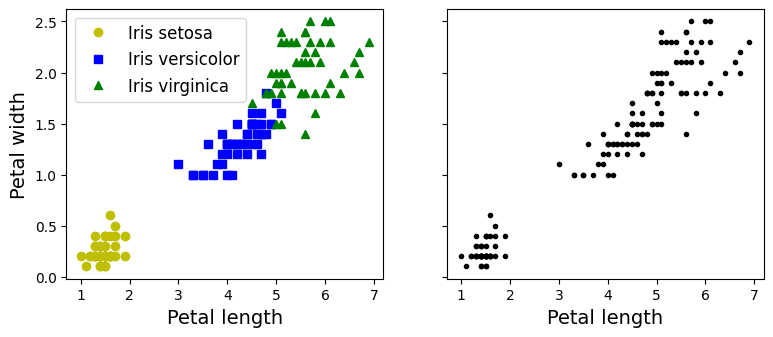

In [2]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

#save_fig("classification_vs_clustering_plot")
plt.show()

- **Figura de la izquierda:** Es un conjunto de datos etiquetado, para el cual los algoritmos de clasificación como Regresión logística, SVM o clasificadores de bosque aleatorio son muy adecuados.
- **Figura de la derecha:** Tenemos el mismo conjunto de datos, pero sin las etiquetas, por lo que ya no puede usar un algoritmo de clasificación.

- Los algoritmos de conglomerados (clustering) buscan extraer grupos homogeneos de datos usando solo las características de entrada.

- **NOTA:** No existe una definición universal de lo que es un *clúster*: depende del contexto, diferentes algoritmos capturarán diferentes tipos de clústeres.

- Algunos algoritmos buscan instancias centradas alrededor de un punto particular, llamado *centroide*. Otros buscan *regiones continuas de instancias densamente empaquetadas*: estos grupos pueden tomar cualquier forma.

## K-means

Dado un conjunto de datos no supervisado:
\begin{equation}
X = \{ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n \}, \quad \mathbf{x}_i \in \mathbb{R}^P
\end{equation}

El problema de optimización del algoritmo K-means, para agrupar los datos de entrada en $K$ grupos disjuntos, se puede definir como:

\begin{align}
\hat{\boldsymbol{\mu}}_k =& \arg\min_{\boldsymbol{\mu}_k} \sum_{k=1}^{K} \sum_{\mathbf{x} \in C_k} \|\mathbf{x} - \boldsymbol{\mu}_k\|^2\\
\text{s.t.} & \quad C_k = \left\{\mathbf{x}_n : k=\min_{j}\|\mathbf{x} - \boldsymbol{\mu}_k\|\right\} \\
& \quad C_k \cap C_{k'} = \emptyset
\end{align}

donde el centro se define como:

\begin{equation}
\boldsymbol{\mu}_k = \frac{1}{|C_k|} \sum_{\mathbf{x} \in C_k} \mathbf{x}
\end{equation}

Y la actualización de los mismos depende de:

\begin{equation}
\boldsymbol{\mu}_k^{(t+1)} = \frac{1}{|C_k^{(t)}|} \sum_{\mathbf{x} \in C_k^{(t)}} \mathbf{x}
\end{equation}

**Ejemplo:** Consideremos un conjunto de datos sin etiqueta representado por $5$ *blobs* de instancias/muestras.

In [3]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.6,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  2],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y     = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


X_ = X

Ahora observemos los *blobs*:

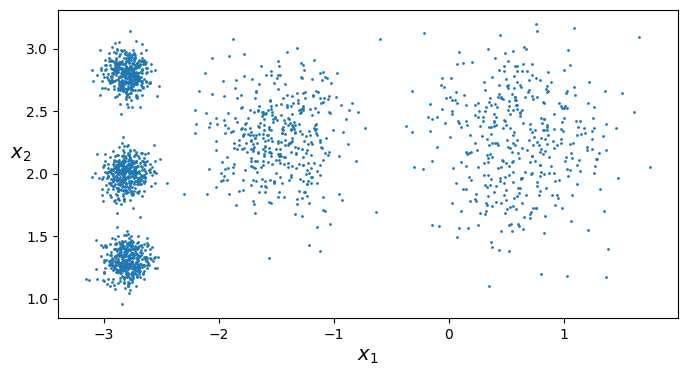

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
#save_fig("blobs_plot")
plt.show()

### Ajuste y predicción

- Vamos a entrenar un *clustering K-Means* en este conjunto de datos.

- **Intentaremos encontrar el centro de cada *blob* y asignar cada instancia al *blob* más cercano**:

In [5]:
from sklearn.cluster import KMeans
k      = 5
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
y_pred = kmeans.fit_predict(X)

- Tengamos en cuenta que debemos especificar el número de clústeres $k$ que debe encontrar el algoritmo.

- En este caso, cada instancia fue asignada a uno de los 5 grupos.

- En el contexto de la agrupación, **la etiqueta de una instancia es el índice de la agrupación a la que el algoritmo asigna esta instancia**.

- No debe confundirse con las etiquetas de clase en clasificación.

- *KMeans* conserva una copia de las etiquetas de las instancias en las que se entrenó, disponible a través de la variable *labels_ instance*:

In [6]:
y_pred

array([1, 1, 4, ..., 3, 4, 1], dtype=int32)

In [7]:
y_pred is kmeans.labels_

True

También podemos echar un vistazo a los 5 centroides que encontró el algoritmo:

In [8]:
kmeans.cluster_centers_

array([[ 0.34187422,  2.22617479],
       [-2.80236767,  1.6483813 ],
       [-1.4714462 ,  2.28524725],
       [-2.79255053,  2.79105781],
       [ 0.95102961,  2.29714359]])

Por supuesto, podemos asignar fácilmente nuevas instancias al clúster cuyo centroide es el más cercano:

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 3, 3], dtype=int32)

### Fronteras de decisión

Tracemos los **límites de decisión del modelo**. Esto nos da un *diagrama de Voronoi*:

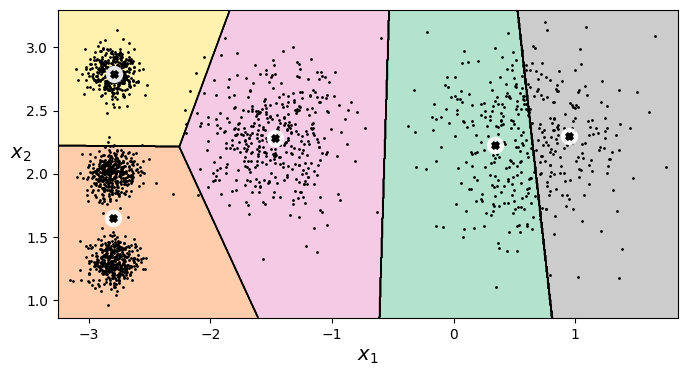

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=20, linewidths=3,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
#save_fig("voronoi_plot")
plt.show()

- La gran mayoría de las instancias estan claramente asignadas al grupo apropiado,**pero algunas instancias probablemente estaban mal etiquetadas** (especialmente cerca del límite entre el grupo superior izquierdo y el grupo central).
- De hecho, el algoritmo **K-Means no se comporta muy bien cuando los *blobs* tienen diámetros muy diferentes**, ya que lo único que le importa al asignar una instancia a un clúster es la distancia al centro.

### Hard Clustering vs Soft Clustering

- En lugar de asignar cada instancia a un solo clúster, lo que se denomina *hard clustering*, puede ser útil **asignar a cada instancia una puntuación por agrupación**: esto se denomina *soft clustering*.

- **Ejemplo:** el puntaje puede ser la distancia entre la instancia y el centroide o, por el contrario, puede ser un puntaje de similitud (o afinidad) como la Función de Base Radial Gaussiana. En la clase *KMeans*, el método *transform()* mide la distancia desde cada instancia a cada centroide:

In [11]:
kmeans.transform(X_new)

array([[0.40991831, 2.82434068, 1.49883952, 2.9024319 , 0.99636922],
       [2.66773081, 5.81301181, 4.48053536, 5.84631629, 2.0704043 ],
       [3.43029572, 1.36599108, 1.68740873, 0.29443525, 4.01305895],
       [3.35307375, 0.87424993, 1.54356583, 0.35742123, 3.95623378]])

### K-Means

**El algoritmo en acción:**

- La clase *KMeans* aplica un algoritmo optimizado por defecto. Para obtener el algoritmo K-Means original (solo con fines educativos), debe establecer *init="random"*, *n_init = 1* and *algorithm="full"*. Estos hiperparámetros se explicarán a continuación.

- Ejecutemos el algoritmo K-Means para 1, 2 y 3 iteraciones, para ver **cómo se mueven los centroides**:

In [12]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=5, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=10, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=10, n_clusters=5, n_init=1, random_state=1)

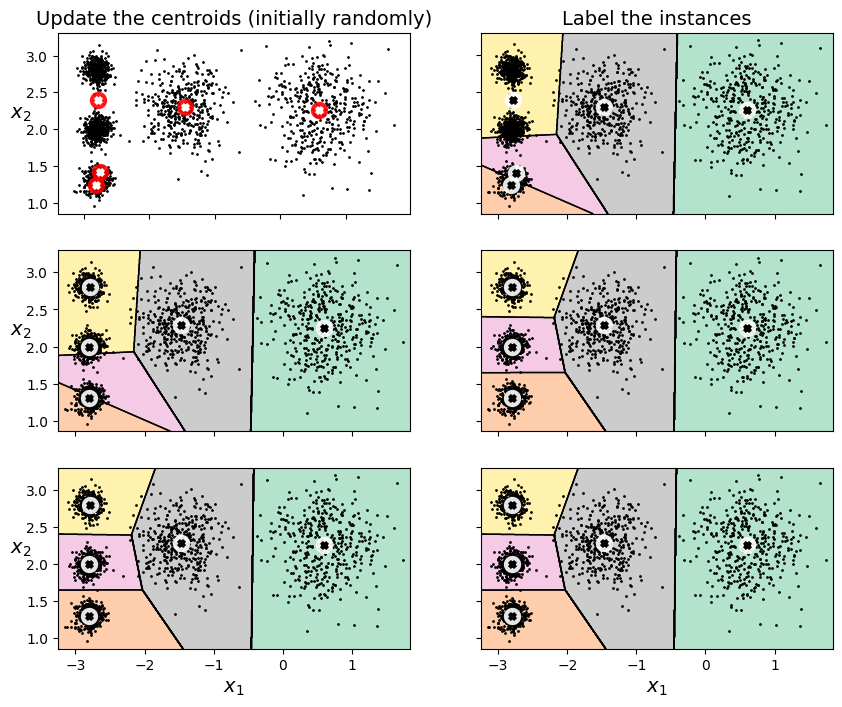

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

#save_fig("kmeans_algorithm_plot")
plt.show()

- Podemos ver el algoritmo en acción en la Figura anterior, los centroides se inicializan aleatoriamente (arriba a la izquierda).
- Luego las instancias se etiquetan (arriba a la derecha).
- Luego los centroides se actualizan (centro a la izquierda).
- Seguido, las instancias se vuelven a etiquetar (centro a la derecha ), y así.

- **NOTA:** La complejidad computacional del algoritmo es generalmente lineal con respecto al número de instancias, el número de clústeres $k$ y el número de dimensiones.

- Sin embargo, esto solo es cierto cuando los datos tienen una estructura de agrupamiento. Si no es así, entonces, en el peor de los casos, la complejidad puede aumentar exponencialmente con el número de instancias.

### Variabilidad en K-Means

**Ejemplo:** la siguiente Figura muestra dos soluciones subóptimas con las que el algoritmo puede converger si no tiene suerte con el paso de inicialización aleatoria:

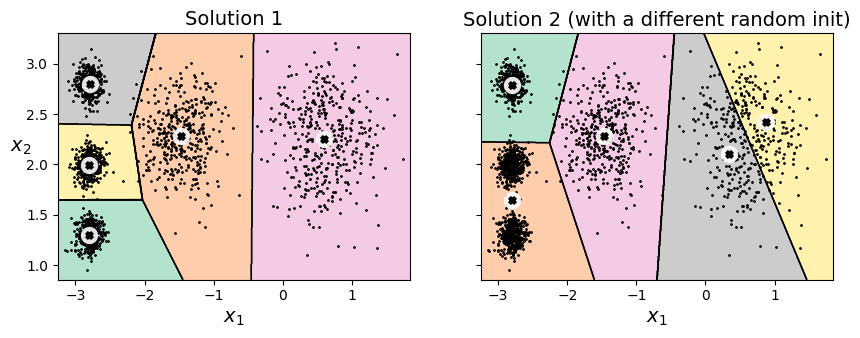

In [15]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         random_state=110)
kmeans_rnd_init2 = KMeans(n_clusters=5, init=np.array([[-3,2.7],[-2.9,2.5],[-1,0.5],[-0.9,0.3],[0.5,0.5]]), n_init=1,
                          random_state=190)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

#save_fig("kmeans_variability_plot")
plt.show()

### Métodos de inicialización de centroides

Si sabemos aproximadamente dónde deberían estar los centroides (por ejemplo, si ejecutó otro algoritmo de agrupación anteriormente), puede establecer el hiperparámetro *init* en una matriz NumPy que contiene la lista de centroides y establecer *n_init* en 1:

In [16]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans    = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

- Otra solución es **ejecutar el algoritmo varias veces con diferentes inicializaciones aleatorias y retonar la mejor solución**.

- Esto se controla mediante el hiperparámetro *n_init*: de forma predeterminada, es igual a 10, lo que significa que todo el algoritmo descrito anteriormente se ejecuta 10 veces cuando se llama al método *fit()*, y Scikit-Learn mantiene la mejor solución.

- Pero, **¿cómo sabe exactamente cuál solución es la mejor?**

- K-means utiliza una métrica de rendimiento llamada *inercia del modelo*: distancia cuadrática media entre cada instancia y su centroide más cercano.

In [17]:
kmeans.inertia_

213.85700616373146

- El método *score()* devuelve la inercia negativa. ¿Por qué negativo? **porque el método *score()* de un predictor siempre debe respetar la regla, a mayor valor mejor**.

In [18]:
kmeans.score(X)

-213.85700616373148

### Múltiples inicializaciones

- Un enfoque para resolver el problema de la variabilidad es **simplemente ejecutar el algoritmo K-Means varias veces con diferentes inicializaciones aleatorias y seleccionar la solución que minimice la inercia**.

- **Ejemplo:** tenemos las inercias de los dos modelos *"malos"* que se muestran en la figura anterior:

In [19]:
kmeans_rnd_init1.inertia_

213.85458436211906

In [20]:
kmeans_rnd_init2.inertia_

272.8609528813104

- Cuando configuramos el hiperparámetro *n_init*, Scikit-Learn ejecuta el algoritmo original *n_init* veces y selecciona la solución que minimiza la inercia. Por defecto, Scikit-Learn establece *n_init = 10*.

In [22]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                               random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=11)

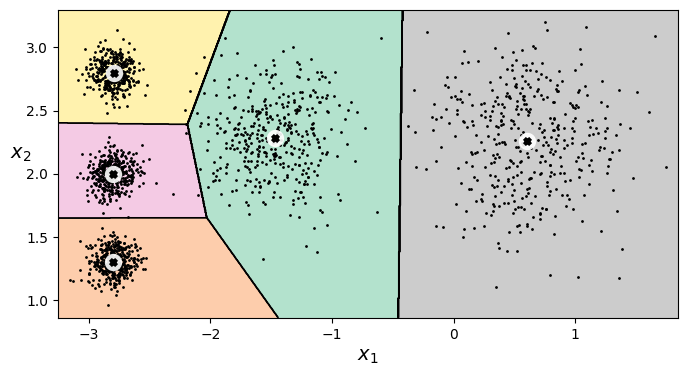

In [23]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### K-Means++

- Para establecer la inicialización en K-Means ++, simplemente se configura *init="k-means ++"* (esto es realmente el valor predeterminado):

- K-means ++ genera centros lejanos entre si para abarcar mejor el espacio de búsqueda.

In [24]:
KMeans()

KMeans()

### Accelerated K-Means

- Para usar la variante K-Means de **Elkan**, simplemente configure *algorithm = "elkan"*.

- Tenga en cuenta que no admite datos dispersos, por lo que, de forma predeterminada, Scikit-Learn usa "*elkan*" para datos densos y "*full*" (el algoritmo K-Means normal) para datos ralos.

- ElKan aprovecha la desigualdad triangular para estimar de forma eficiente las distancias entre puntos.

In [25]:
%timeit -n 20 KMeans(algorithm="elkan",n_init='auto').fit(X)

8.18 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [26]:
%timeit -n 20 KMeans(n_init='auto').fit(X)

4.71 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


### Mini-Batch K-Means

- Implementación de K-means por lotes.

- Actualiza los centros sobre subconjuntos aleatorios de puntos, favoreciendo el costo computacional.


In [27]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42,n_init='auto')
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [28]:
minibatch_kmeans.inertia_

313.93439856837193

- Si el conjunto de datos no cabe en la memoría RAM, la opción más simple es usar la clase *memmap*.

- **Ejemplo:** Primero carguemos la base de datos de dígitos escritos a mano MNIST:

In [29]:
import os
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1)/255.
X_test  = X_test.reshape(X_test.shape[0], -1)/255.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


- A continuación, escribámoslo en un *memmap*:

In [30]:
from tempfile import mkdtemp
import os.path as path
filename = path.join(mkdtemp(), 'my_mnist.data')
X_mm     = np.memmap(filename, dtype='float32', mode='w+', shape=X_train.shape)
X_mm[:]  = X_train

# Flush changes to disk -> actualizar en disco
X_mm.flush()

del X_mm

- Ahora cargamos y entrenamos desde el memmap:

In [31]:
X_mm = np.memmap(filename, dtype='float32', mode='r', shape=X_train.shape)
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42,n_init='auto')
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

- Si nuestros datos son tan grandes que no puede usar *memmap*, las cosas se vuelven más complicadas.

- Comencemos escribiendo una función para cargar el próximo lote :

In [32]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

- Ahora podemos entrenar al modelo al alimentarlo un batch a la vez.

- También necesitamos implementar múltiples inicializaciones y mantener el modelo con la menor inercia:

In [33]:
np.random.seed(42)

X = X_train

k            = 5
n_init       = 10
n_iterations = 100
batch_size   = 100
init_size    = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size,n_init='auto')
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

best_kmeans.score(X)

-2357706.880524697

**Mini-batch K-Means es mucho más rápido que los K-Means normales**:

In [34]:
%timeit KMeans(n_clusters=5,n_init='auto').fit(X)

7.55 s ± 3.27 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit MiniBatchKMeans(n_clusters=5,n_init='auto').fit(X)

619 ms ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- **¡Eso es mucho más rápido!** Sin embargo, su rendimiento es a menudo más bajo (mayor inercia), y se sigue degradando a medida que aumenta $k$.


# Cómo encontrar el número de grupos?

- **Ejemplo:** como podemos ver a continuación, establecer $k$ en 3 o 8 da como resultado modelos bastante malos:

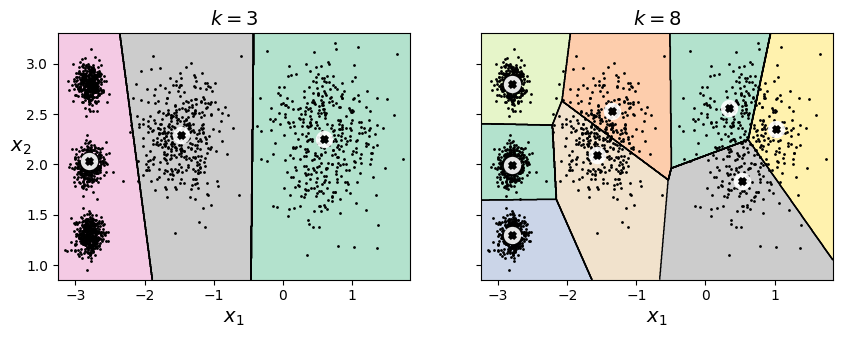

In [36]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

X = X_ #gaussians

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
#save_fig("bad_n_clusters_plot")
plt.show()

- **TIP:** Quizás estemos pensando que podríamos **elegir el modelo con la menor inercia**.

- **Respuesta:** Lamentablemente, no es tan simple. La inercia no es una buena medida de rendimiento cuando se trata de elegir $k$, ya que sigue disminuyendo a medida que aumentamos $k$. De hecho, cuantos más grupos haya, más cerca estará cada instancia de su centroide más cercano.

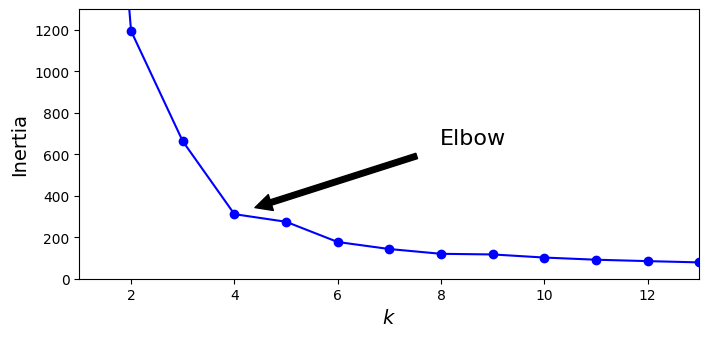

In [37]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42,n_init='auto').fit(X)
                for k in range(1, 14)]
inertias     = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 14), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 13, 0, 1300])
#save_fig("inertia_vs_k_plot")
plt.show()

- Como podemos ver, la inercia cae muy rápidamente a medida que aumentamos $k$ hasta 4, pero luego disminuye mucho más lentamente a medida que seguimos aumentando $k$.
- Esta curva tiene aproximadamente la forma de un brazo, y hay un "*codo*" en $k = 4$, por lo que si no lo supiéramos mejor, sería una buena opción: cualquier valor más bajo sería dramático, mientras que cualquier valor más alto no ayudaría mucho.

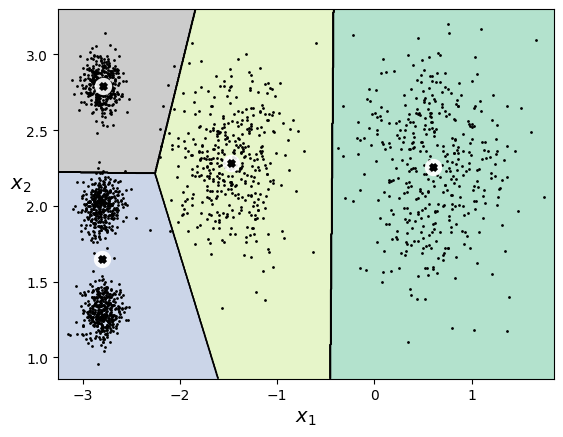

In [38]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

### Silueta

- Una altenativata a la inercia, es el *silhouette score*, como versión normalizada por grupo del concepto de inercia:


\begin{equation}
s_n = \frac{b_n - a_n}{\max(a_n, b_n)}
\end{equation}

\begin{equation}
S = \frac{1}{N} \sum_{n=1}^{N} s_n
\end{equation}


- $a_n:$ distancia promedio desde la muestra n a todos los puntos en el mismo cluster.

- $b_n:$ distancia mínima desde la muestra n a todos los puntos en el cluster más cercano.

- Puede usar la función *silhouette_score()* de Scikit-Learn, dándole todas las instancias en el conjunto de datos y las etiquetas que se les asignaron.


Tracemos la puntuación de la silueta en función de $k$:

In [39]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.7000294635075308

Comparemos los puntajes de silueta para diferentes números de grupos:

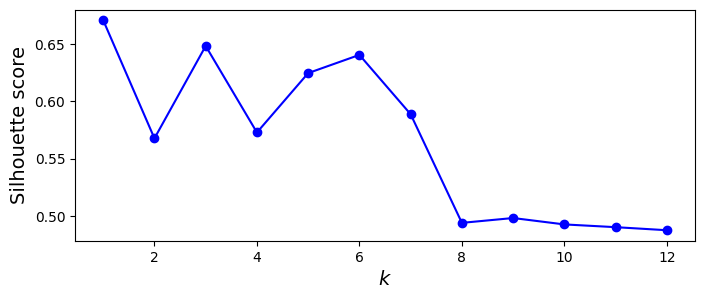

In [40]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 13), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

- Como podemos ver, aunque **confirma que $k = 4$ es una muy buena opción**.

Adicionalmente, obtenemos una visualización aún más informativa cuando trazamos el *silhouette score* de cada instancia, ordenado por el grupo al que están asignados y por el valor del coeficiente (**diagrama de silueta**):

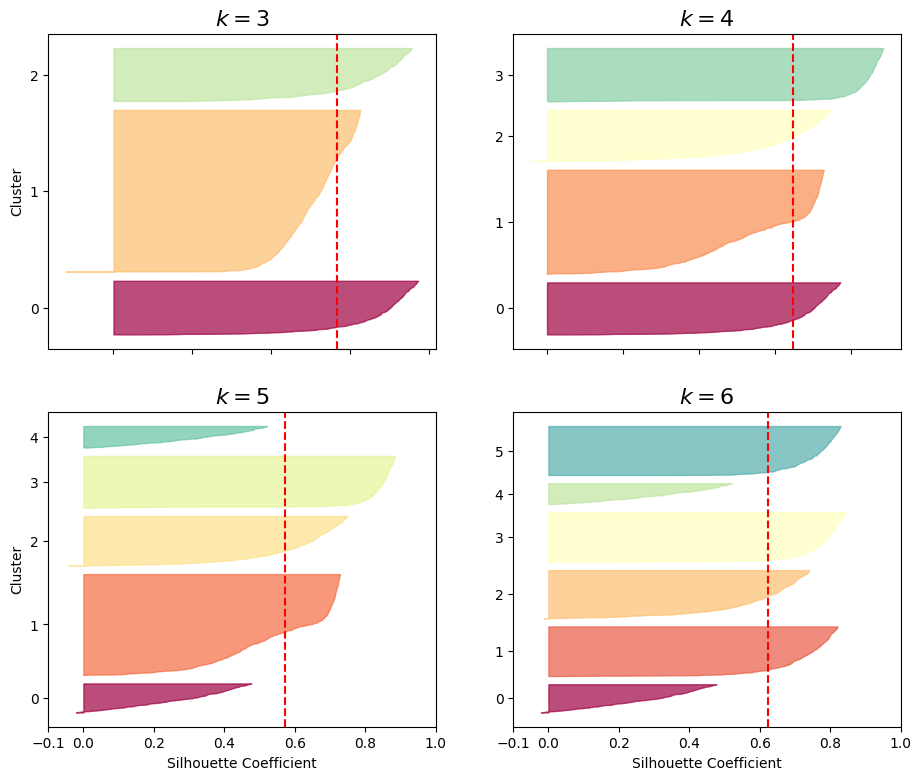

In [41]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred                  = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos     = padding
    ticks   = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.show()

- Las líneas discontinuas verticales representan el *silhouette score* por grupo.
- Cuando la mayoría de las instancias en un grupo tienen un coeficiente más bajo que este puntaje (es decir, si muchas de las instancias se detienen cerca de la línea punteada, terminando a la izquierda de la misma), entonces **el grupo es bastante malo, sus instancias están demasiado cerca de otros grupos**.


### Consideraciones sobre K-Means

**Ejemplo:** la Figura a continuación muestra cómo KMeans agrupa un conjunto de datos que contiene tres grupos elipsoidales de diferentes dimensiones, densidades y orientaciones:

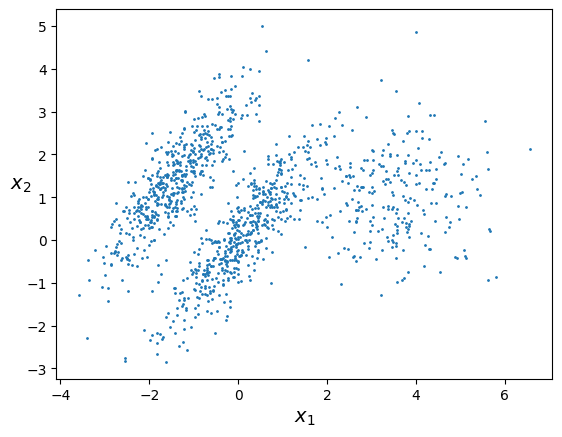

In [42]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1     = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2     = X2 + [6, -8]
X      = np.r_[X1, X2]
y      = np.r_[y1, y2]

plot_clusters(X)

In [43]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad  = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

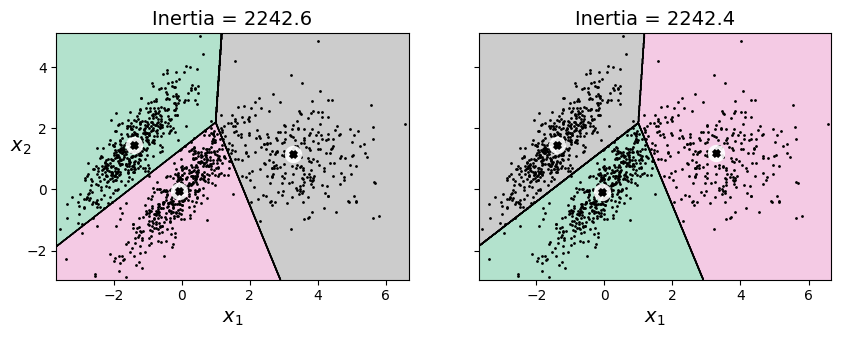

In [44]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

#save_fig("bad_kmeans_plot")
plt.show()

Como podemos ver, **ninguna de estas soluciones es buena**.

- La solución a la izquierda es mejor, pero aún corta el $25\%$ del grupo intermedio y lo asigna al grupo a la derecha.
- La solución a la derecha es simplemente terrible, a pesar de que su inercia es menor.

Entonces, dependiendo de los datos, los diferentes algoritmos de agrupación pueden funcionar mejor. Por ejemplo, en estos tipos de grupos elípticos, los **modelos de mezcla gaussiana** funcionan muy bien.

**TIP:** Es importante **escalar las características de entrada antes de ejecutar K-Means**, de lo contrario, los grupos pueden estar muy extendidos y K-Means funcionará mal. Escalar las características no garantiza que todos los clústeres sean agradables y esféricos, pero generalmente mejora las cosas.

## DBSCAN

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN) es un algoritmo de clustering que considera la densidad de puntos en una región.

- Puede ser útil para estructuras no lineales y para la detección de atípicos.

- Su funcionamiento se centra en la estimación de vecindarios:


\begin{equation}
N_{\varepsilon}(p) = \{q \in D \mid \text{dist}(p, q) \leq \varepsilon\}
\end{equation}

- Y tiene en cuenta la restricción:

\begin{equation}
|N_{\varepsilon}(p)| \geq \text{minPts}
\end{equation}

- Un punto es considerado alcanzable (core-point), si:

\begin{equation}
q \in N_{\varepsilon}(p) \quad \text{and} \quad |N_{\varepsilon}(p)| \geq \text{minPts}
\end{equation}

In [45]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

In [46]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

Las etiquetas de todas las instancias ahora están disponibles en la variable *labels_ instance*:

In [47]:
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1,  0, -1,  5, -1])

- Tenga en cuenta que algunas instancias tienen un índice de clúster igual a **-1**: esto significa que **el algoritmo las considera anomalías**.

- Los índices de las instancias centrales están disponibles en la variable de instancia *core_sample_indices_*, y las propias instancias centrales están disponibles en la variable *components_ instance*:

In [48]:
len(dbscan.core_sample_indices_)

13

In [49]:
dbscan.core_sample_indices_

array([  6,  17,  34,  90, 128, 165, 179, 227, 234, 246, 247, 249, 276])

In [50]:
dbscan.components_[:3]

array([[ 0.4119847 , -0.28596972],
       [ 0.72038373, -0.41616684],
       [ 0.76244287, -0.39694127]])

In [51]:
import numpy as np
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [52]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [53]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

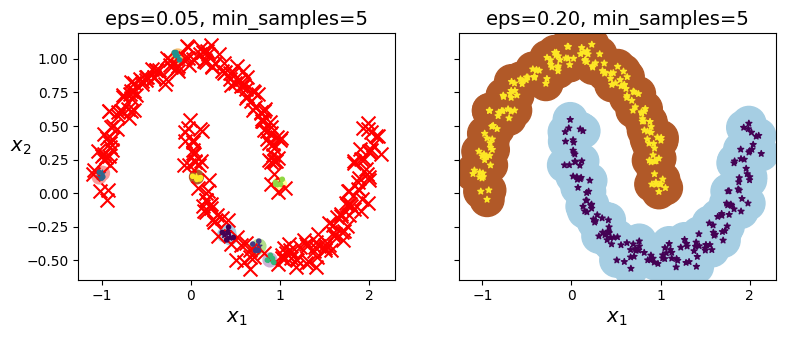

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

#save_fig("dbscan_plot")
plt.show()


- Como podemos ver, el algoritmo identificó bastantes anomalías, además de 7 grupos diferentes.

Afortunadamente, si **ampliamos el vecindario de cada instancia** al aumentar $\epsilon$ a 0.2, obtenemos el agrupamiento a la derecha, que se ve perfecto.

La clase **DBSCAN** no tiene un método *predict_()*, aunque tiene un método *fit_predict_()*. En otras palabras, no puede predecir a qué clúster pertenece una nueva instancia. La razón de esta decisión es que varios algoritmos de clasificación podrían tener sentido aquí, y es bastante fácil entrenar uno, por ejemplo, un clasificador K-NN:

In [55]:
dbscan = dbscan2

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

- Ahora, dadas algunas instancias nuevas, **podemos predecir a qué grupo probablemente pertenecerán**, e incluso **estimar una probabilidad para cada grupo**.
- Tengamos en cuenta que solo los entrenamos en las instancias centrales, pero también podríamos haber optado por usar **todas las instancias**, o **todas menos las anomalías**: esta elección depende de la tarea final.

In [57]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 0, 0])

In [58]:
knn.predict_proba(X_new)

array([[0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.76, 0.24]])

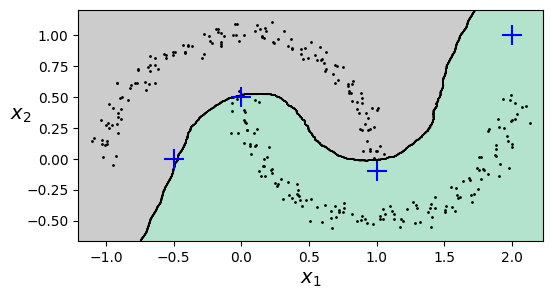

In [59]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
#save_fig("cluster_classification_plot")
plt.show()

El límite de decisión se representa en la Figura anterior:
- Las cruces representan las 4 instancias en *X_new*.
- Tengamos en cuenta que, dado que no hay ninguna anomalía en el conjunto de entrenamiento del KNN, **el clasificador siempre elige un grupo, incluso cuando ese grupo está muy lejos**.

Sin embargo, es bastante sencillo introducir una *distancia máxima*, en cuyo caso **las dos instancias que están lejos de ambos grupos se clasifican como anomalías**. Para hacer esto, podemos usar el método de los *kneighbors()* del **KNeighsClassifier**: dado un conjunto de instancias, devuelve las distancias y los índices de los $k$ vecinos más cercanos en el conjunto de entrenamiento (dos matrices, cada una con $k$ columnas):

In [60]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

### Spectral clustering

- Se basa en la similitud entre puntos (Gaussian kernel)

\begin{equation}
w_{nm} = \exp\left(-\frac{\|x_n - x_m\|^2}{2\sigma^2}\right)
\end{equation}

- Tiene en cuenta el grado de la matriz de similitud para ser robusta a datos atípicos:

\begin{equation}
d_{nn} = \sum_{m} w_{nm}
\end{equation}

- Posteriormente, se encuenta la matríz Laplaciano:

\begin{equation}
L = D - W
\end{equation}

- Y se normaliza:

\begin{equation}
L_{sym} = D^{-\frac{1}{2}} L D^{-\frac{1}{2}} = I - D^{-\frac{1}{2}} W D^{-\frac{1}{2}}
\end{equation}

- Otra alternativa de normalización:

\begin{equation}
L_{rw} = D^{-1} L = I - D^{-1} W
\end{equation}

- Se descompone en valores y vectores propios:

\begin{equation}
L \mathbf{u} = \lambda \mathbf{u}
\end{equation}

- Finalmente se aplica un algoritmo tradicional de clustering, e.g., Kmeans, sobre los vectores propios escogidos.

In [61]:
from sklearn.cluster import SpectralClustering
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [62]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [63]:
np.percentile(sc1.affinity_matrix_, 95) #puntos con similitud alta

0.037950332908433894

In [64]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

<ipython-input-64-85f7a15da4f6>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)


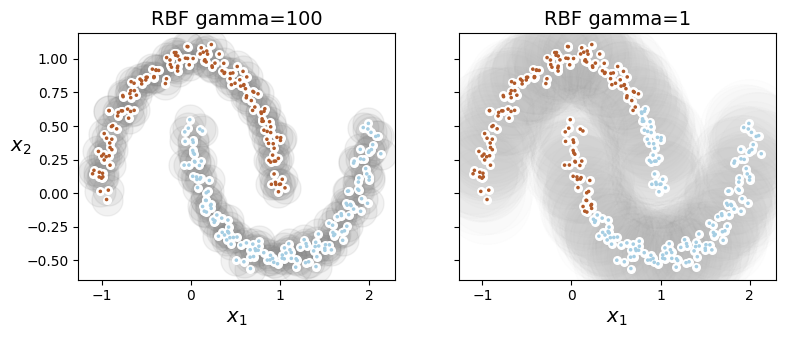

In [65]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### Gráfico tipo grafo

- Grafiquemos un grafo sobre los datos a partir de la similitud calculada

In [66]:
!pip install networkx matplotlib

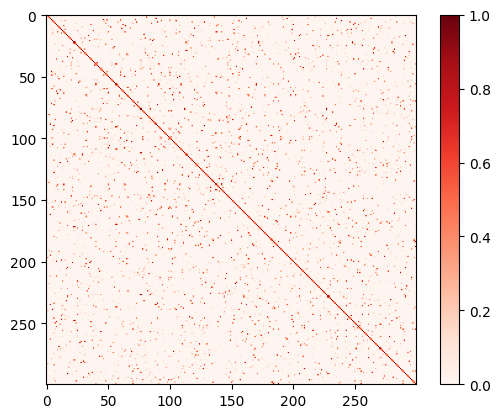

In [67]:
import networkx as nx
from scipy.spatial.distance import cdist, squareform
# Gaussian similarity

def gaussK(X,gamma=1):
  D = cdist(X,X)
  return np.exp(-gamma*D**2)

similarity_matrix = gaussK(X,gamma=100)
plt.imshow(similarity_matrix,cmap='Reds')
plt.colorbar()
plt.show()

In [68]:
# Create a graph from the similarity matrix using NetworkX

th_ = np.percentile(similarity_matrix, 90)

G = nx.Graph()

# Add nodes
for i in range(similarity_matrix.shape[0]):
    G.add_node(i)

# Add edges with weights
for i in range(similarity_matrix.shape[0]):
    for j in range(i + 1, similarity_matrix.shape[0]):
        if similarity_matrix[i, j] > th_:  # Optional: threshold to filter weak connections
            G.add_edge(i, j, weight=similarity_matrix[i, j])



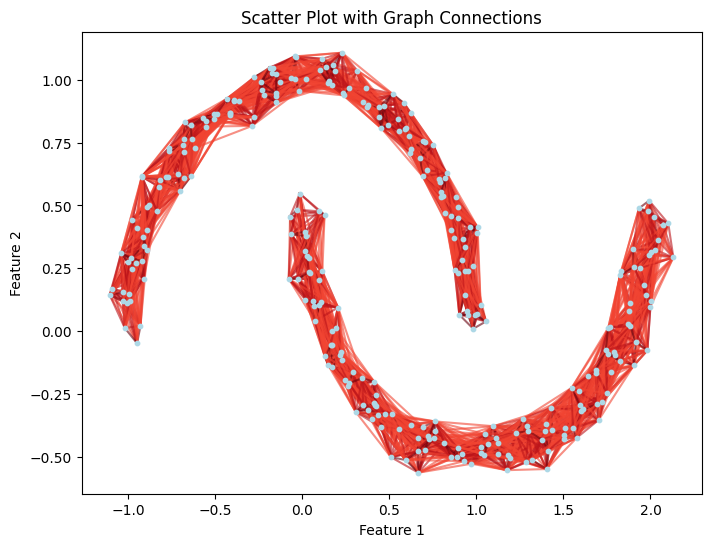

In [72]:
import matplotlib.cm as cm
plt.figure(figsize=(8, 6))

vq = np.percentile(similarity_matrix, [50,75,80,90,95,99])
colormap = plt.get_cmap('Reds',len(vq))
colors = colormap(np.linspace(0, 1, len(vq)))


# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c='lightblue', s=10, zorder=2)
# Plot the graph connections
for (i, j) in G.edges():
    plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]],
             c=colors[np.argmin(cdist(similarity_matrix[i,j].reshape(-1,1),vq.reshape(-1,1)))], alpha=0.6, zorder=1)

plt.title('Scatter Plot with Graph Connections')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 1))
#plt.colorbar(sm, label='Vector Value')
plt.show()

# Ejercicio

- Realice una comparación de los métodos de clustering vistos, para generar una segmentación de imagen a color, incluyendo la información de ubicación de cada pixel.

- Consulte en qué consiste el algoritmo PCA y [UMAP](https://umap-learn.readthedocs.io/en/latest/). Ver guía [Reducción de dimensión](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/8_ReduccionDimension.ipynb)

- Repita el punto anterior realizando una proyección 2D de los datos con PCA y UMAP antes de generar las segmentaciones.